# Linear Classifier (선형분류)

- 계산한 값이 0보다 작은 클래스는 -1, 0보다 크면 +1이라고 예측(분류)
> ŷ = w[0] * x[0] + w[1] * x[1] + … + w[p] * x[p] + b > 0 <br>
> Linear Regression와 매우 비슷하지만 가중치(w) 합을 사용하는 대신 예측한 값을 임계치 0 과 비교

- 이진 선형 분류기는 선, 평면, 초평면을 이용하여 2개의 클래스를 구분하는 분류기


경사하강법(Gradient Descent) 최적화 알고리즘을 사용하여 선형 모델을 작성

[SGDClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

```
SGDClassifier(alpha, average, class_weight, epsilon, eta0, fit_intercept, l1_ratio, learning_rat, loss, max_iter, n_iter, n_jobs, penalty, power_t, random_state, shuffle, tol, verbose, warm_start)
```
확률적 경사하강법(SGD, Stochastic Gradient Descent)을 이용하여 선형모델을 구현

- lossstr : 손실함수 (default='hinge')
- penalty : {'l2', 'l1', 'elasticnet'}, default='l2'
- alpha : 값이 클수록 강력한 정규화(규제) 설정 (default=0.0001)
- l1_ratio : L1 규제의 비율(Elastic-Net 믹싱 파라미터 경우에만 사용) (default=0.15)
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default=True)
- max_iter : 계산에 사용할 작업 수 (default=1000)
- tol : 정밀도
- shuffle : 에포크 후에 트레이닝 데이터를 섞는 유무 (default=True)
- epsilon : 손실 함수에서의 엡실론, 엡실론이 작은 경우, 현재 예측과 올바른 레이블 간의 차이가 임계 값보다 작으면 무시 (default=0.1)
- n_jobs : 병렬 처리 할 때 사용되는 CPU 코어 수
- random_state : 난수 seed 설정
- learning_rate : 학습속도 (default='optimal')
- eta0 : 초기 학습속도 (default=0.0)
- power_t : 역 스케일링 학습률 (default=0.5)
- early_stopping : 유효성 검사 점수가 향상되지 않을 때 조기 중지여부 (default=False)
- validation_fraction : 조기 중지를위한 검증 세트로 설정할 교육 데이터의 비율 (default=0.1)
- n_iter_no_change : 조기중지 전 반복횟수 (default=5)
- class_weight : 클래스와 관련된 가중치 {class_label: weight} or “balanced”, default=None
- warm_start : 초기화 유무 (default=False)
- average : True로 설정하면 모든 업데이트에 대한 평균 SGD 가중치를 계산하고 결과를 coef_속성에 저장 (default=False)


#### LinearClassifier 실습 01

붓꽃 데이터 셋에 선형분류 적용

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


iris = load_iris()
iris.data.shape
iris.target.shape

(150,)

In [2]:
x, y = iris.data, iris.target

In [3]:
x2 = x[:,:2] #꽃받침에 길이와 넓이 
x2.shape
x2[:5]

#plt.scatter(x2[:,0],x2[:,1])
#plt.show()

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

In [4]:
y2 = y.copy()
y2[y2 ==2] = 1
y2 #0과 나머지는 1로 바뀐다.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [5]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x2,y2,test_size = 0.5,random_state = 0)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(75, 2)
(75,)
(75, 2)
(75,)


In [6]:
from sklearn.linear_model import SGDClassifier
import numpy as np

model = SGDClassifier(max_iter=1000)
model.fit(train_x,train_y)
model.coef_,model.intercept_
model.score(train_x,train_y), model.score(test_x,test_y)






(0.96, 0.96)

No handles with labels found to put in legend.


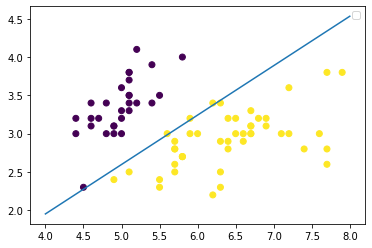

In [8]:
xx0 = np.linspace(4,8,50)
w1 = model.coef_[0,0]
w2= model.coef_[0,1]
b = model.intercept_

xx1 = -(w1*xx0 + b) / w2 #새로운 데이터의 직선을 찾을때\

plt.scatter(train_x[:,0],train_x[:,1],c = train_y)
plt.legend()
plt.plot(xx0,xx1)
plt.show()


#### 4개 속성 모두 이용

세가지 꽃 구분

In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

iris = datasets.load_iris()
x,y = iris.data,iris.target
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.3 ,random_state = 0)

model = SGDClassifier(max_iter=1000)
model.fit(train_x,train_y)

model.score(train_x,train_y) ,model.score(test_x,test_y)

(0.6952380952380952, 0.6)